In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data = pd.read_csv('datasets/boston_data.csv', index_col=0)

In [3]:
data.head(8)

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,
1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
11,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,20.45,15.0
12,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,13.27,18.9
13,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,15.71,21.7


In [4]:
data.shape

(333, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 11 columns):
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(8), int64(3)
memory usage: 31.2 KB


In [6]:
data.describe()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


Text(1.675,0.5,'Price')

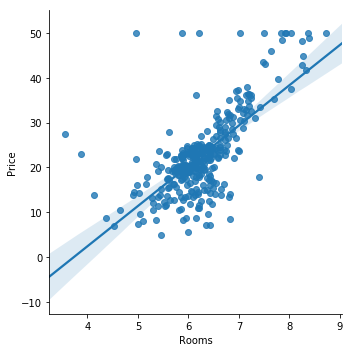

In [7]:
sns.lmplot('rm', 'medv', data)

plt.xlabel('Rooms')
plt.ylabel('Price')

Text(10.05,0.5,'Price')

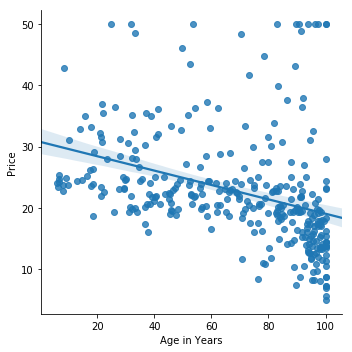

In [8]:
sns.lmplot('age', 'medv', data)

plt.xlabel('Age in Years')
plt.ylabel('Price')

Text(10.05,0.5,'Price')

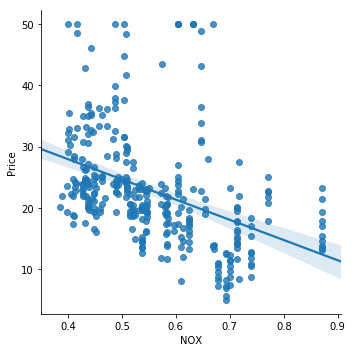

In [9]:
sns.lmplot('nox', 'medv', data)

plt.xlabel('NOX')
plt.ylabel('Price')

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
X = data.drop(["medv", "tax", "indus"], axis=1)
Y = data['medv']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [63]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = lr.predict(x_test)
y_pred # OLS - ordinary least squares

array([24.92682141, 28.43004709, 16.1208181 , 13.90583755, 22.05682354,
       25.62212472, 26.77692752, 19.24469998, 25.83870939, 19.49765513,
       16.8257476 , 26.17238463, 31.36136967, 37.09779306, 14.87745956,
       34.58964182, 23.96054292, 25.86383789, 24.81012742, 24.819339  ,
       19.7307989 , 20.47219582, 19.6580426 ,  5.08216226, 15.94253432,
       21.76084802, 26.56878583, 38.07030952, 23.36207666, 25.12134274,
       14.90835182, 35.36298537, 36.70575826, 20.63275377])

In [69]:
df_y = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_y.sample(5)

,y_test,y_pred
ID,,
84,22.9,24.926821
110,19.4,19.730799
298,20.3,19.497655
262,43.1,35.362985
97,21.4,25.121343


In [66]:
print("Training Score: ", lr.score(x_train, y_train))

Training Score:  0.7010686012959586


In [67]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.7702116266624596